In [11]:
from tensorflow.keras.models import load_model

model = load_model("hybrid_model.keras")
print(model.inputs)


[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>, <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


C:\Users\sures\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 334 variables whereas the saved optimizer has 666 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
class_names = ['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

In [17]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as preprocess_mobilenet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet

IMAGE_SIZE = (224, 224)  # must match training size

def predict_image(img_path, model, class_names, actual_label=None):
    # Load and preprocess image for MobileNetV3
    img_m = tf.keras.utils.load_img(img_path, target_size=IMAGE_SIZE)
    x_m = tf.keras.utils.img_to_array(img_m)
    x_m = np.expand_dims(x_m, axis=0)
    x_m = preprocess_mobilenet(x_m)

    # Load and preprocess image for DenseNet121
    img_d = tf.keras.utils.load_img(img_path, target_size=IMAGE_SIZE)
    x_d = tf.keras.utils.img_to_array(img_d)
    x_d = np.expand_dims(x_d, axis=0)
    x_d = preprocess_densenet(x_d)

    # Predict using hybrid model
    preds = model.predict([x_m, x_d])
    predicted_class_index = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)
    predicted_name = class_names[predicted_class_index]

    # Display the image with prediction
    img_show = tf.keras.utils.load_img(img_path)
    plt.imshow(img_show)
    plt.axis('off')

    # Prepare title with predicted and actual (if provided)
    if actual_label:
        accuracy = "Correct" if predicted_name == actual_label else "Wrong"
        plt.title(f"Predicted: {predicted_name} ({confidence*100:.2f}%)\nActual: {actual_label} → {accuracy}")
    else:
        plt.title(f"Predicted: {predicted_name} ({confidence*100:.2f}%)")

    plt.show()
    return predicted_name, confidence

# Example usage:
# predicted_name, confidence = predict_image("sample_test_image.jpg", model, class_names, actual_label="Corn Borers")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


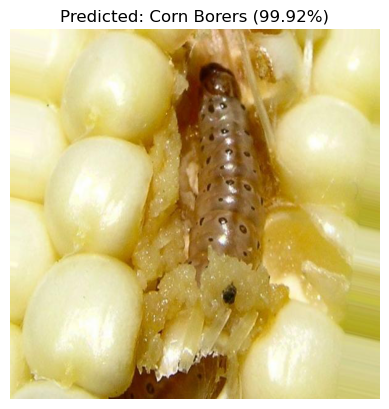

('Corn Borers', np.float32(0.9991549))

In [18]:
predict_image(r"C:\Users\sures\OneDrive\Desktop\Projects\insect_project\dataset\Corn Borers\aug_Image_1_0_3434.jpeg",model,class_names)